In [1]:
import networkx as nx
import json
import collections
import itertools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from heapq import *

# POINT 1

# Definition of jaccard similarity

In [2]:
def jaccard_sim(set1,set2):
    set1=set(set1)
    set2=set(set2)
    return len(set1 & set2)/len( set1 | set2)

Define some functions to read and store data

In [3]:
def load_json(name):
    with open( name + '.json', 'r') as f:
        return json.load(f)

In [4]:
def save_json(name_file, data ):
    with open( name_file + '.json', 'w') as f:
        return json.dump(data, f,indent=3)

Read the Json file from local

In [7]:
data=load_json('reduced_dblp')

Create an empty graph

In [8]:
G=nx.Graph()

Define a function to create a dictionaty usefull to access information very fast

In [9]:
def dict_name(data):
    

    DICT={}
  
    for i in tqdm(range(len(data))):

        for auth in range(len(data[i]['authors'])):

            if data[i]['authors'][auth]['author_id'] not in DICT.keys():

                DICT[data[i]['authors'][auth]['author_id']]={'author_name':data[i]['authors'][auth]['author'],
                                               'id_publication_int':[data[i]['id_publication_int']],
                                               'id_conference_int':[data[i]['id_conference_int']]}    

            else:
                DICT[data[i]['authors'][auth]['author_id']]['id_publication_int'].append(data[i]['id_publication_int']),
                DICT[data[i]['authors'][auth]['author_id']]['id_conference_int'].append(data[i]['id_conference_int'])    




    return DICT        

In [10]:
data_small=dict_name(data) 

100%|██████████| 3096/3096 [00:00<00:00, 154698.72it/s]


# Add nodes

Define a function to add nodes to graph.

Each node of the graph is an author ID

In [11]:
def graph_complete(data):
    G=nx.Graph()
    for k,v in tqdm(data.items()):
        G.add_node(k, **v)  #**v take the dict like attr
    return G

In [12]:
G=graph_complete(data_small)

100%|██████████| 7771/7771 [00:00<00:00, 390538.30it/s]


Define a function to create a dictionary which keys are the publication, and the id the list of conferences

In [13]:
def pub_id_f(data):
    
    dict_publication={}
    for i in tqdm(range(len(data))):
        dict_publication[data[i]["id_publication_int"]]=[]
        for j in range(len(data[i]["authors"])):
            dict_publication[data[i]["id_publication_int"]].append(data[i]["authors"][j]["author_id"]) 
        
                    
    return dict_publication

In [14]:
pub_id=pub_id_f(data)

100%|██████████| 3096/3096 [00:00<00:00, 312573.78it/s]


# Add edges using jaccard similarity as weight

In [15]:
def add_weighted_edges(pub_id,graph):

    for pub in pub_id.keys():
        
        for (i,v) in itertools.combinations(pub_id[pub], 2):
        
            graph.add_edge(i,v, weight= 1-jaccard_sim(graph.node[i]['id_publication_int'],
                                                      graph.node[v]['id_publication_int']))

    return graph

In [16]:
G=add_weighted_edges(pub_id,G)   

In [17]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 7771\nNumber of edges: 16489\nAverage degree:   4.2437'

# POINT 2

## SUBPOINT 1

Given a conference in input, return the subgraph induced by the set of authors who published at the input conference at least once. Once you have the graph, compute some centralities measures (degree, closeness, betweeness) and plot them.

In [18]:
# We use function subgraph, that wants as parameter the list of nodes that are used in the subgraph

Ask to user a conference in input

In [20]:
control=False
while control==False:


    print("Insert conference id:")
    conf_input=int(input())
    if conf_input not in pub_id.keys():
        print("ERROR\nConference ID not found")
        print("Try another time")
        print("\n")
    else:
        control=True


Insert conference id:
3245
ERROR
Conference ID not found
Try another time


Insert conference id:
234
ERROR
Conference ID not found
Try another time


Insert conference id:


KeyboardInterrupt: 

In [18]:
conf_input=12693

In [19]:
def conference_subgraph(data, conf_id):
    
    return G.subgraph([k for k in tqdm(data.keys()) if conf_id in data[k]['id_conference_int']])

In [20]:
K=conference_subgraph(data_small,conf_input)

100%|██████████| 904664/904664 [00:00<00:00, 1088258.98it/s]


In [21]:
nx.info(K)

'Name: \nType: Graph\nNumber of nodes: 1589\nNumber of edges: 5098\nAverage degree:   6.4166'

Calculate degree centrality

In [22]:
degree = nx.degree_centrality(K)

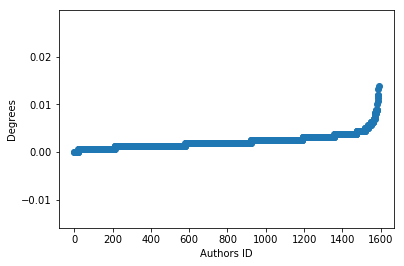

In [55]:
x= range(len(list(degree.values())))
y= sorted(list(degree.values()),reverse=False)
plt.scatter(x,y)
plt.xlabel("Authors ID")
plt.ylabel("Degrees")
plt.show()

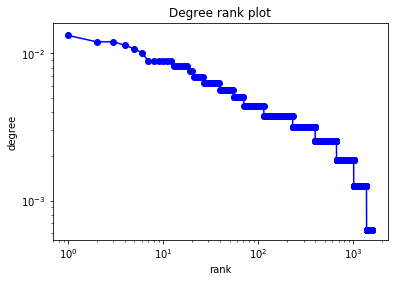

In [48]:
degree_sequence=sorted(degree.values(),reverse=True) # degree sequence

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

Closeness centrality

In [45]:
closeness=nx.closeness_centrality(K)

Betweeness centrality

In [46]:
betweeness = nx.betweenness_centrality(K,weight="weight")

In [47]:
betweeness

{24151: 0.0,
 255688: 7.936016659286172e-06,
 93126: 0.0,
 255926: 1.322669443214362e-05,
 9503: 2.0898177202786928e-05,
 9505: 1.1374957211643514e-05,
 255996: 0.0,
 8985: 0.0,
 256176: 2.3808049977858513e-06,
 114483: 1.4549363875357983e-06,
 255300: 0.0,
 8352: 0.0,
 17824: 0.0,
 17184: 0.0020369057737773606,
 9751: 0.00010953214612035736,
 16780: 0.0,
 8650: 0.003689000658235895,
 9317: 3.3476133765163493e-06,
 271706: 3.7160712928403507e-07,
 35691: 0.0,
 8315: 0.0001137268977831229,
 115211: 1.454936387535798e-06,
 99555: 2.6453388864287235e-07,
 8861: 0.0038643639520727973,
 8860: 0.004040150500131561,
 9664: 0.0021030188634191043,
 364858: 0.0,
 204853: 0.0,
 114821: 7.936016659286172e-06,
 101707: 0.0,
 114552: 0.0,
 9096: 0.0,
 8659: 0.003869684862290083,
 225947: 0.0,
 273515: 0.0012932608329083762,
 10660: 0.0,
 8863: 0.003962513582870428,
 14854: 0.0,
 34402: 0.0005051756128455988,
 9003: 0.001768035479841034,
 365188: 0.0,
 12375: 0.0,
 156372: 0.0009314073403531474,
 200

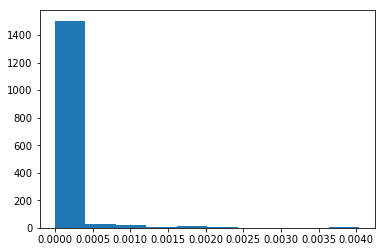

In [56]:
x= sorted(list(betweeness.keys()),reverse=True)
y= sorted(list(betweeness.values()),reverse=True)
plt.hist( y)
plt.show()

In [57]:
def centrality_scatter(dict1,dict2, ylab="",xlab="",title="",line=False):
 # Create figure and drawing axis
    fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]

    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")

    if line:
        # use NumPy to calculate the best fit
        slope, yint = np.polyfit(xdata,ydata,1)
        xline = plt.xticks()[0]
        yline = list(map(lambda x: slope*x+yint,xline))
        ax1.plot(xline,yline,ls='--',color='r')
    # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab) 
    plt.show()

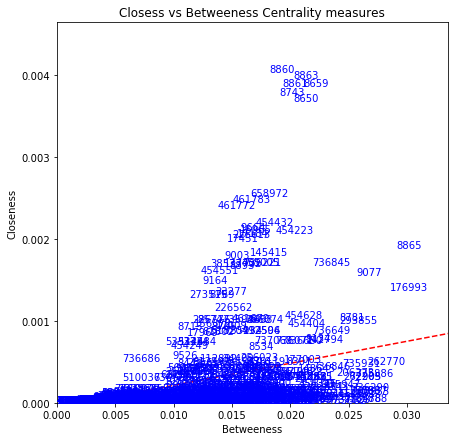

In [58]:
centrality_scatter(closeness,betweeness,"Closeness", "Betweeness", "Closess vs Betweeness Centrality measures", True)

# Point 2.2

In [23]:
def author_subgraph(graph,n, d):
  
   return nx.ego_graph(G,n, radius=d, center=True, undirected=True)

In [42]:
def draw_author_subgraph(author_distance, node_input):
    set_color=[ 'blue' if node==node_input else 'red' for node in author_distance]
    return nx.draw_networkx(author_distance, with_labels=False,node_color=set_color, 
                   labels=nx.get_node_attributes(author_distance,'author_name'), 
                   font_weight='bold',node_size=5,edge_size=0.004,edge_color="grey")

In [25]:
author_distance= author_subgraph(G,7809, 2)

In [26]:
nx.info(author_distance)

'Name: \nType: Graph\nNumber of nodes: 458\nNumber of edges: 1875\nAverage degree:   8.1878'

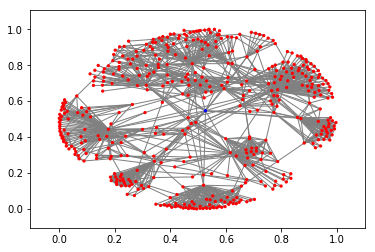

In [43]:
draw_author_subgraph(author_distance,7809)
plt.show()

# POINT 3.1

Aris id is 256176

In [16]:
aris=256176

Define a function to find the shortest path

In [21]:
lst_tot=[]
for xx in G.nodes(): 
    for yy in G[xx]:

        lst=(xx,yy,G[xx][yy]["weight"])
        lst_tot.append(lst)
        

In [30]:
def dijkstra_heap(edges, start, end):
    g = defaultdict(list)
    for node1,node2,weight in edges:
        g[node1].append((weight,node2))

    q = [(0,start,())] 
    seen=set()
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == end: return (cost)

            for c, v2 in g.get(v1, ()):
                if v2 not in seen:
                    heappush(q, (cost+c, v2, path))

    return float("inf")

Now take an author in input

In [17]:
control=False
while control==False:
    print("Type author id:")
    aut_input=int(input())
    if aut_input in G.nodes():
        control=True
    else:
        print("Invalid input:\nTry another time\n")

Type author id:
7809


In [23]:
xx=20405
yy=16390

In [31]:
dijkstra_heap(lst_tot,xx,yy)

9.98726551226551

# Point 3.2

Write a Python software that takes in input a subset of nodes (cardinality smaller than 21) and returns, for each node of the graph, its GroupNumber